# 1. Importing Libraries


In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


# 2. Importing and checking application_data.csv and previous_application.csv

In [357]:
#importing application_data.csv using pandas
app_train= pd.read_csv("application_data.csv")

#checking the rows and columns of the raw dataset
app_train.shape

(307511, 122)

In [358]:
#Checking information of all the columns
app_train.info(verbose=True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [359]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [360]:
# Checking the numeric variables of the dataframes
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [361]:
#importing previous_application.csv using pandas
preapp_train = pd.read_csv('previous_application.csv')

#checking the rows and columns of the raw dataset
preapp_train.shape

(1670214, 37)

In [362]:
preapp_train.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
#Checking information of all the columns
preapp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [364]:
# Checking the numeric variables of the dataframes
preapp_train.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Comment:

- prev_ap_df contains 37 features and 1670214 rows (Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

- application_df contains 121 features, 1 target variable, and 307511 rows (Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)

# 3. Data Cleaning - "application_data.csv"

## 3.1 Drop Columns having more than 50% of missing values 

In [365]:
app_train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [366]:
app_train.isna().sum().sort_values(ascending=False).head(45)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [367]:
# Finding the percentage of missing values in all columns
round(app_train.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [368]:
#Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
app_train = app_train.loc[:,app_train.isnull().mean()<=0.5]
app_train.shape

(307511, 81)

## 3.2 Dealing with null values more than 15%

In [369]:
#creating a function to find null values for the dataframe
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [370]:
# Find columns with more than 15% null value

nullcol_15 = null_values(app_train)[null_values(app_train)>15]
nullcol_15


FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

- from the columns dictionary we can conclude that only 'OCCUPATION_TYPE', 'EXT_SOURCE_3 looks relevant to TARGET column.thus dropping all other columns except 'OCCUPATION_TYPE','EXT_SOURCE_3

In [371]:
#removing 'OCCUPATION_TYPE', 'EXT_SOURCE_3' from "nullcol_15" so that we can drop all other at once.

nullcol_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [372]:
print(nullcol_15)
print()
print("No of columns having missing values more than 15% and are not reletable:",len(nullcol_15))

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

No of columns having missing values more than 15% and are not reletable: 8


In [373]:
#thus removing columns having missing values more than 15% and which are not reletable to TARGET column.

app_train.drop(nullcol_15.index,axis=1, inplace = True)

In [374]:
app_train.shape  # After dropping null_col_15, we have left with 73 columns

(307511, 73)

## 3.3 Impute the missing Values for columns with <12% missing value

In [375]:
#Selecting columns with less or equal to than 12% null vallues
list(app_train.columns[(app_train.isnull().mean()<=0.12) & (app_train.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

### 3.3.1 EXT_SOURCE_2 imputation

In [376]:
app_train['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

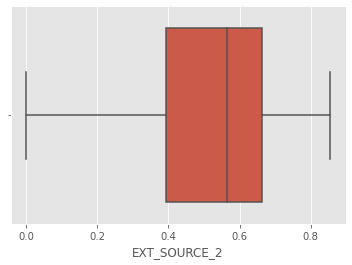

In [377]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers


sns.boxplot(app_train['EXT_SOURCE_2'])
plt.show()

In [378]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
impute = round(app_train['EXT_SOURCE_2'].mean(),2)
impute

0.51

- Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. 0.51

### 3.3.2 Loan Annuity imputation

In [379]:
app_train['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

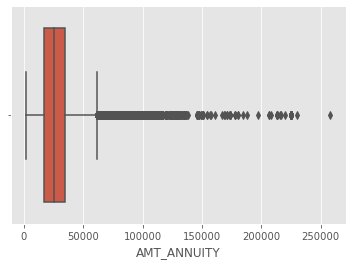

In [380]:
# Since AMT_ANNUITY is a continuous variable. So checking for outliers
sns.boxplot(app_train['AMT_ANNUITY'])
plt.show()

In [381]:
impute = round(app_train['AMT_ANNUITY'].median(),2)
impute

24903.0

- Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. 24903.0

### 3.3.3 NAME_TYPE_SUITE imputation

In [382]:
app_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [383]:
impute= app_train['NAME_TYPE_SUITE'].mode()
impute

0    Unaccompanied
dtype: object

- Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied

### 3.3.4 CNT_FAM_MEMBERS imputation

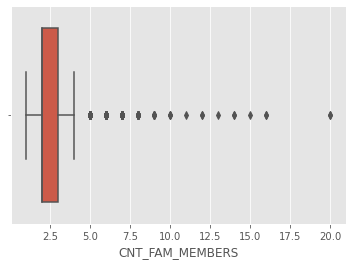

In [384]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(app_train['CNT_FAM_MEMBERS'])
plt.show()

In [385]:
impute=round(app_train['CNT_FAM_MEMBERS'].median(),2)
impute

2.0

- Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. 2.0

### 3.3.5 AMT_GOODS_PRICE imputation

In [386]:
app_train['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

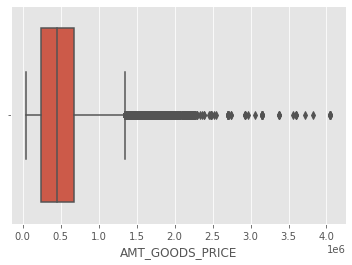

In [387]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(app_train['AMT_GOODS_PRICE'])
plt.show()

In [388]:
# Since this is a continuous variable with outliers we can impute column using median value
impute = round(app_train['AMT_GOODS_PRICE'].median(),2)
impute

450000.0

- Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. 450000.0

### 3.3.6 Imputing for "OCCUPATION_TYPE" column

In [389]:
#Percentage of each category present in "OCCUPATION_TYPE"

app_train["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [390]:
app_train["OCCUPATION_TYPE"].isnull().sum() 

96391

In [391]:
# imputing null values with "Unknown"

app_train["OCCUPATION_TYPE"] = app_train["OCCUPATION_TYPE"].fillna("Unknown")

In [392]:
app_train["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 

0

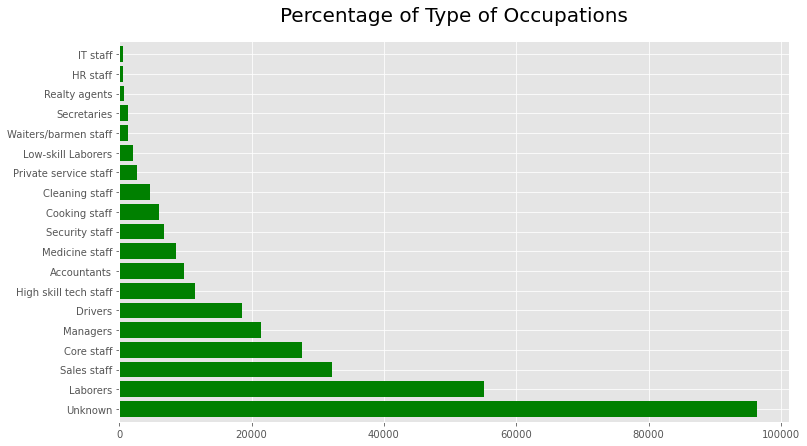

In [393]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(app_train["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "green",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

## 3.4 Checking Document columns

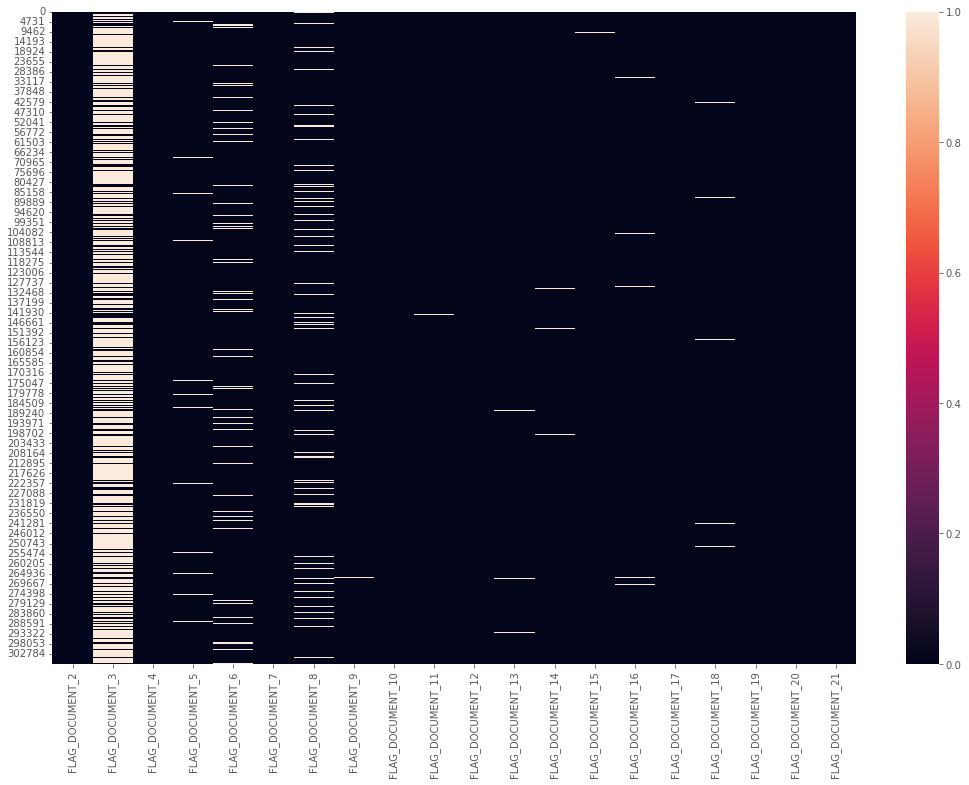

In [394]:
starting_idx = app_train.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = app_train.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(app_train.iloc[:,starting_idx:ending_idx])
plt.show()

- Comment:

    * The heatmap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases.
    * Hence we can assumen all the document (except document 3) will not contribute towards analyzing the data. Hence all this columns can be dropped.

## 3.3 Check datatypes of columns and modify them appropriately

In [395]:
#Checking the float type columns
app_train.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [396]:
#Converting these count columns to int64
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
app_train.loc[:,ColumnToConvert]=app_train.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [397]:
#Checking the object type columns
ColumnToConvert = list(app_train.select_dtypes(include='object').columns)
ColumnToConvert

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [398]:
app_train.loc[:,ColumnToConvert]=app_train.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))


In [399]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
#Making Gender more readable
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [401]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
app_train = app_train[app_train['CODE_GENDER']!='XNA']
app_train['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

## 3.4 Binning variables for analysis

In [402]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of Lakhs
app_train['AMT_INCOME_TOTAL']=app_train['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

app_train['AMT_INCOME_RANGE']=pd.cut(app_train['AMT_INCOME_TOTAL'],bins,labels=slot)

In [403]:
round((app_train["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.74
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [404]:
app_train['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0       0.2565
0.1       0.8100
0.3       1.1250
0.6       1.6200
0.8       2.2500
1.0    1170.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [405]:
#Creating A new categorical variable based on income total
app_train['INCOME_GROUP']=pd.qcut(app_train['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [406]:
#Binning DAYS_BIRTH
abs(app_train['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [407]:
#Creating a column AGE using DAYS_BIRTH
app_train['AGE']=abs(app_train['DAYS_BIRTH'])//365.25

In [408]:
app_train['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [409]:
# Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
app_train['AGE_GROUP'] = pd.cut(app_train['AGE'],bins=np.arange(20,71,5))

In [410]:
# Check for newly created columns
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,INCOME_GROUP,AGE,AGE_GROUP
0,100002,1,Cash loans,Male,N,Y,0,2.025,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,High,25.0,"(20, 25]"
1,100003,0,Cash loans,Female,N,N,0,2.700,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,VeryHigh,45.0,"(40, 45]"
2,100004,0,Revolving loans,Male,Y,Y,0,0.675,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,VeryLow,52.0,"(50, 55]"
3,100006,0,Cash loans,Female,N,Y,0,1.350,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1L-2L,Medium,52.0,"(50, 55]"
4,100007,0,Cash loans,Male,N,Y,0,1.215,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,Medium,54.0,"(50, 55]"


# 4. Data Cleaning - "previous_application.csv"

In [411]:
preapp_train.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [412]:
preapp_train.isna().sum().sort_values(ascending=False).head(45)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [413]:
# Finding the percentage of missing values in all columns
round(preapp_train.isnull().mean()*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

## 4.1 Removing columns with more than 50% of null values

In [414]:
#Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
preapp_train = preapp_train.loc[:,preapp_train.isnull().mean()<=0.5]
preapp_train.shape

(1670214, 33)

- Four columns have been removed in this process

In [415]:
# Extracting the numeric features from previous application data

numeric = []
for col in preapp_train.columns:
    if preapp_train[col].dtype == float or preapp_train[col].dtype == int:
        numeric.append(col)
        
print(numeric)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [416]:
preapp_numeric = pd.DataFrame()

for col in numeric:
    preapp_numeric[col] = preapp_train[col]
    
preapp_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297979 non-null  float64
 1   AMT_APPLICATION            1670214 non-null  float64
 2   AMT_CREDIT                 1670213 non-null  float64
 3   AMT_GOODS_PRICE            1284699 non-null  float64
 4   CNT_PAYMENT                1297984 non-null  float64
 5   DAYS_FIRST_DRAWING         997149 non-null   float64
 6   DAYS_FIRST_DUE             997149 non-null   float64
 7   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 8   DAYS_LAST_DUE              997149 non-null   float64
 9   DAYS_TERMINATION           997149 non-null   float64
 10  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(11)
memory usage: 140.2 MB


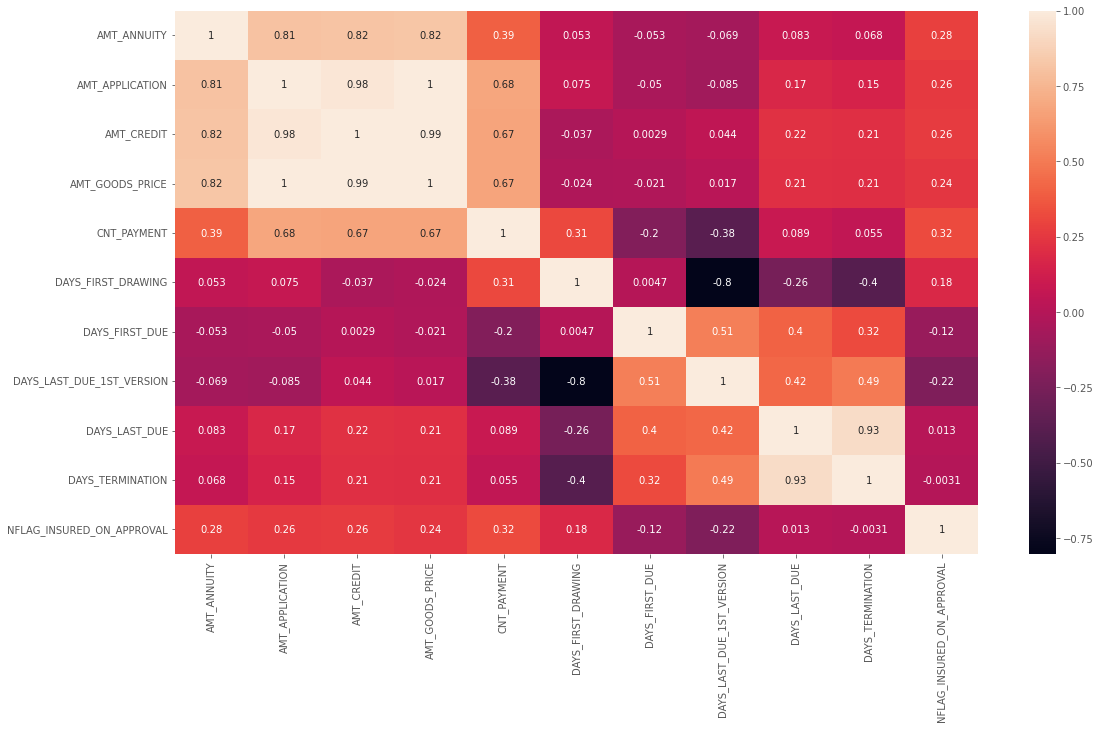

In [417]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(18,10))
sns.heatmap(preapp_numeric.corr(), annot=True)
plt.show()

- Comment:

    - 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated
    - 'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high negative correlation
    - 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated

The features can be removed before modelling this data, as they would cause collinearity 'DAYS_TERMINATION','DAYS_LAST_DUE_1st_VERSION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' For EDA purpose we are not removing them.

    - 'SK_ID_PREV' column is not required for analysis.

In [418]:
preapp_train.drop(['SK_ID_PREV'], axis=1, inplace=True)

In [419]:
preapp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_GOODS_PRICE              1284699 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 7   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 10  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

In [420]:
print(preapp_train['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [421]:
# Filling missing value as 'Unaccompanied' as most common value

preapp_train['NAME_TYPE_SUITE'].fillna(preapp_train.NAME_TYPE_SUITE.mode()[0], inplace=True)

## 4.2 merging both dataset based on 'SK_ID_CURR' 

In [422]:
# Merging only required columns of application_data with previous_application_data

merged_train = pd.merge(app_train[['SK_ID_CURR', 'TARGET']], preapp_train, how='left', on=['SK_ID_CURR'])

merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430100 non-null  int64  
 1   TARGET                       1430100 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413646 non-null  object 
 3   AMT_ANNUITY                  1106438 non-null  float64
 4   AMT_APPLICATION              1413646 non-null  float64
 5   AMT_CREDIT                   1413645 non-null  float64
 6   AMT_GOODS_PRICE              1094130 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413646 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413646 non-null  float64
 9   FLAG_LAST_APPL_PER_CONTRACT  1413646 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413646 non-null  float64
 11  NAME_CASH_LOAN_PURPOSE       1413646 non-null  object 
 12  NAME_CONTRACT_STATUS         1413646 non-n

In [423]:
# Checking on the numeric data
merged_train.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430100e+06,1.430100e+06,1.106438e+06,1.413646e+06,1.413645e+06,1.094130e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.106443e+06,852573.000000,852573.000000,852573.000000,852573.000000,852573.000000,852573.000000
mean,2.784722e+05,8.624572e-02,1.583715e+04,1.752422e+05,1.963529e+05,2.264502e+05,1.247887e+01,9.964319e-01,-8.803712e+02,3.149935e+02,1.605202e+01,342257.063591,13489.117936,33275.707622,76665.920689,82353.604242,0.330566
std,1.028024e+05,2.807266e-01,1.472502e+04,2.936238e+05,3.194835e+05,3.159400e+05,3.331485e+00,5.962675e-02,7.835434e+02,7.695231e+03,1.456665e+01,88833.335981,71651.033182,106163.005532,149704.917515,153537.344812,0.470417
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,6.257700e+03,1.975050e+04,2.487870e+04,4.982400e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789560e+05,0.000000e+00,1.122354e+04,7.087050e+04,8.059500e+04,1.102455e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675120e+05,0.000000e+00,2.041968e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [424]:
merged_train.shape

(1430100, 33)

## 4.3 Handling Outliers

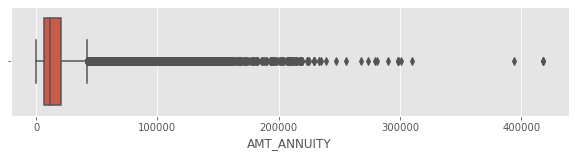

In [425]:
plt.figure(figsize=(10,2))
sns.boxplot(merged_train['AMT_ANNUITY'])
plt.show()

In [426]:
# Excluding values outside 99 percentile for AMT_ANNUITY

merged_train = merged_train[merged_train['AMT_ANNUITY'] < np.nanpercentile(merged_train['AMT_ANNUITY'], 99)]

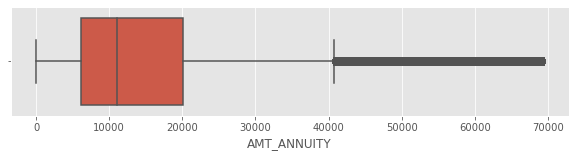

In [427]:
#Checking the features after updating.

plt.figure(figsize=(10,2))
sns.boxplot(merged_train['AMT_ANNUITY'])
plt.show()

## 4.4 Imputing missing values

In [428]:
# imputing missing value with median
preapp_train['AMT_ANNUITY'].fillna(preapp_train['AMT_ANNUITY'].median(),inplace = True)

# 5. Data Analysis

- Based on the Cleaned data from the given dataset We will perform Data Analysis to get meaningfun insights


- Strategy: The data analysis flow has been planned in following way :

    - Imbalance in Data
    - Categorical Data Analysis
    - Categorical segmented Univariate Analysis
    - Categorical Bi/Multivariate analysis
    - Numeric Data Analysis
    - Bi-furcation of databased based on TARGET data
    - Correlation Matrix
    - Numerical segmented Univariate Analysis
    - Numerical Bi/Multivariate analysis

## 5.1 Check for data imbalance

In [429]:
app_train['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

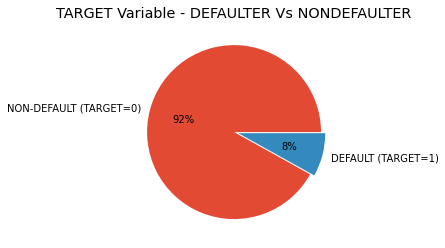

In [430]:
#plottiong pie chart for data imbalance
plt.pie(app_train['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

- Repayer Percentage is 91.93%
- Defaulter Percentage is 8.07%
- Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)

## 5.2 Creating Functions to plot data

In [431]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "object":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [432]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [433]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [434]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [435]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [436]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(app_train.select_dtypes(["object"]).columns)   # Categorical columns list
num_col = list(app_train.select_dtypes(["int","float"]).columns)  #N Numerical Column list

## 5.3 Categorical Variable Analysis

### 5.3.1 Univariate Analysis

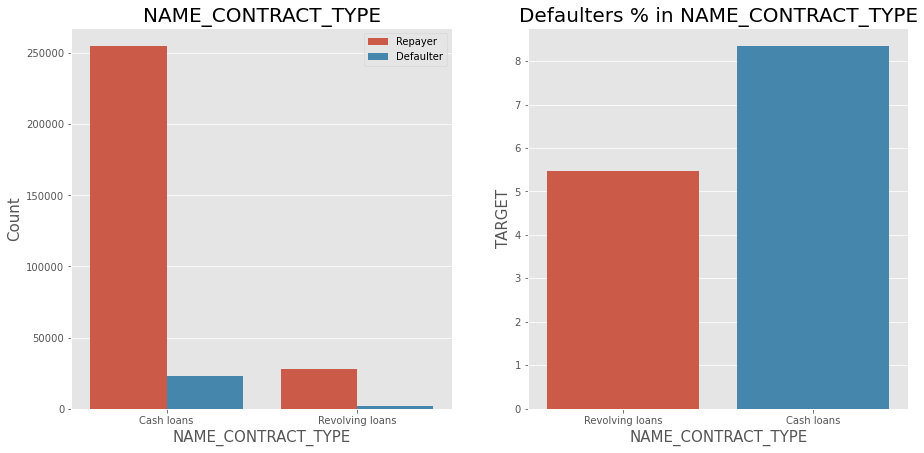

In [437]:
#1 Checking the contract type based on loan repayment status
univariate(app_train,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

Inferences: Contract type

    - Revolving loans are just a small fraction (10%) from the total number of loans
    - Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters

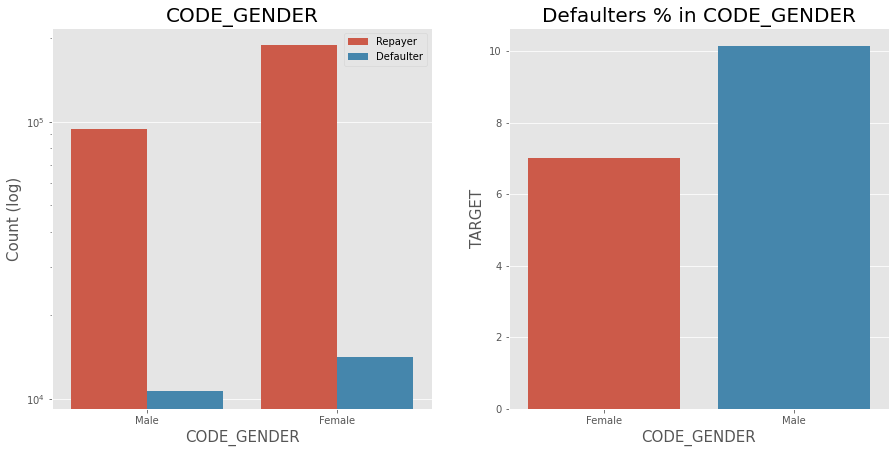

In [438]:
#2 Checking the type of Gender on loan repayment status
univariate(app_train,"CODE_GENDER","TARGET",True,False,True)

Inferences: Gender Type

    - The number of female clients is almost double the number of male clients.
    - Based on the percentage of defaulted credits, males have a higher chance of not returning their loans about 10%, comparing with women about 7%

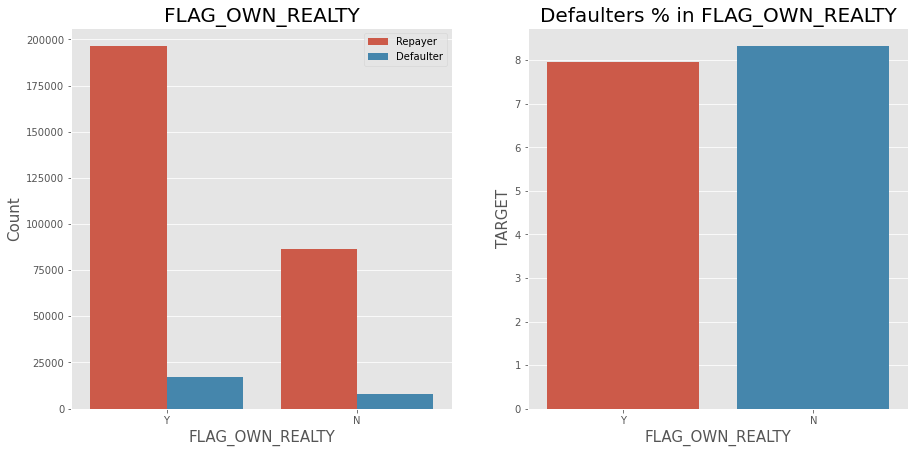

In [439]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(app_train,"FLAG_OWN_REALTY","TARGET",False,False,True)

Inferences:

    - The clients who own real estate are more than double of the ones that don't own.
    - The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.

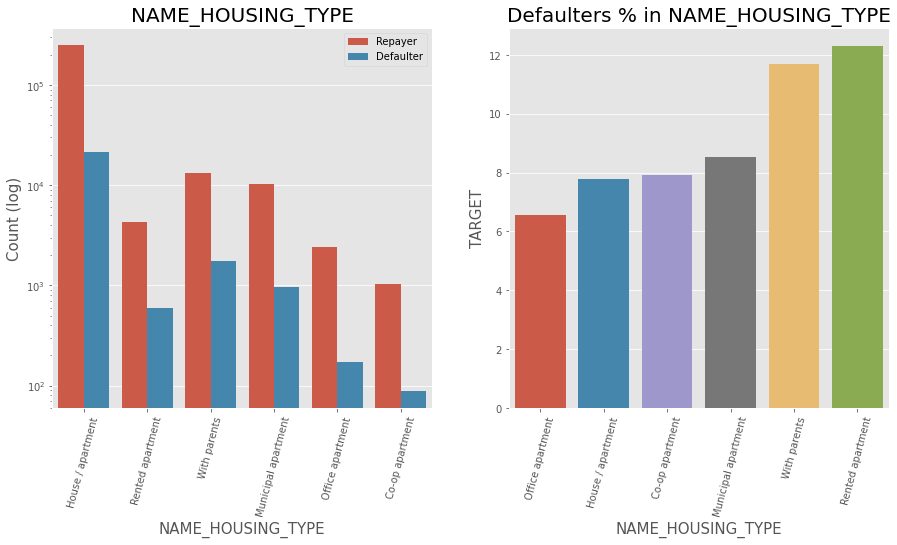

In [440]:
#4 Analyzing Housing Type based on loan repayment status
univariate(app_train,"NAME_HOUSING_TYPE","TARGET",True,True,True)

Inferences: Applicant House type

    - Majority of people live in House/apartment
    - People living in office apartments have lowest default rate
    - People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

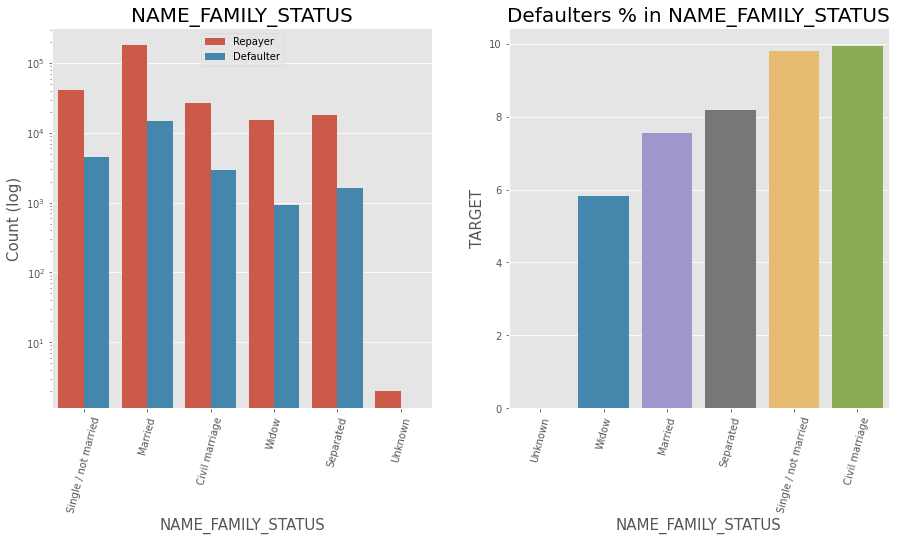

In [441]:
#5 Analyzing Family status based on loan repayment status
univariate(app_train,"NAME_FAMILY_STATUS","TARGET",True,True,True)

Inferences:

    - Most of the people who have taken loan are married, followed by Single/not married and civil marriage
    - In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).

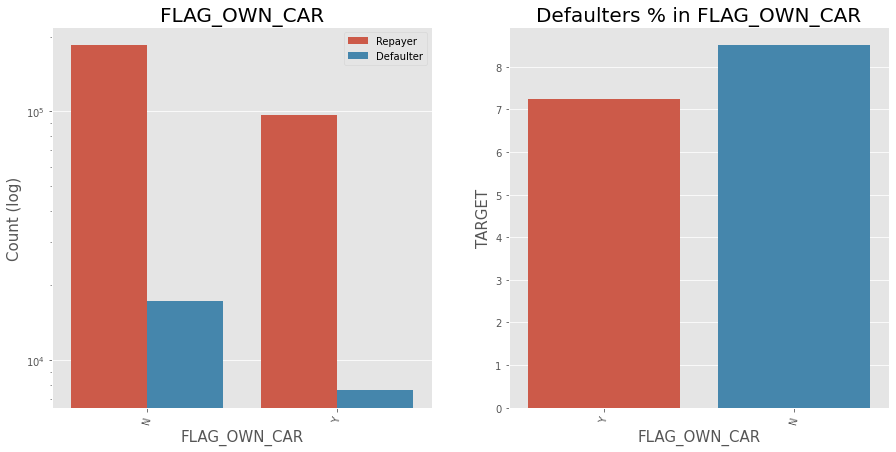

In [442]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(app_train,"FLAG_OWN_CAR","TARGET",True,True,True)

    - While people who have car default more often, the reason could be there are simply more people without cars
    - Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.

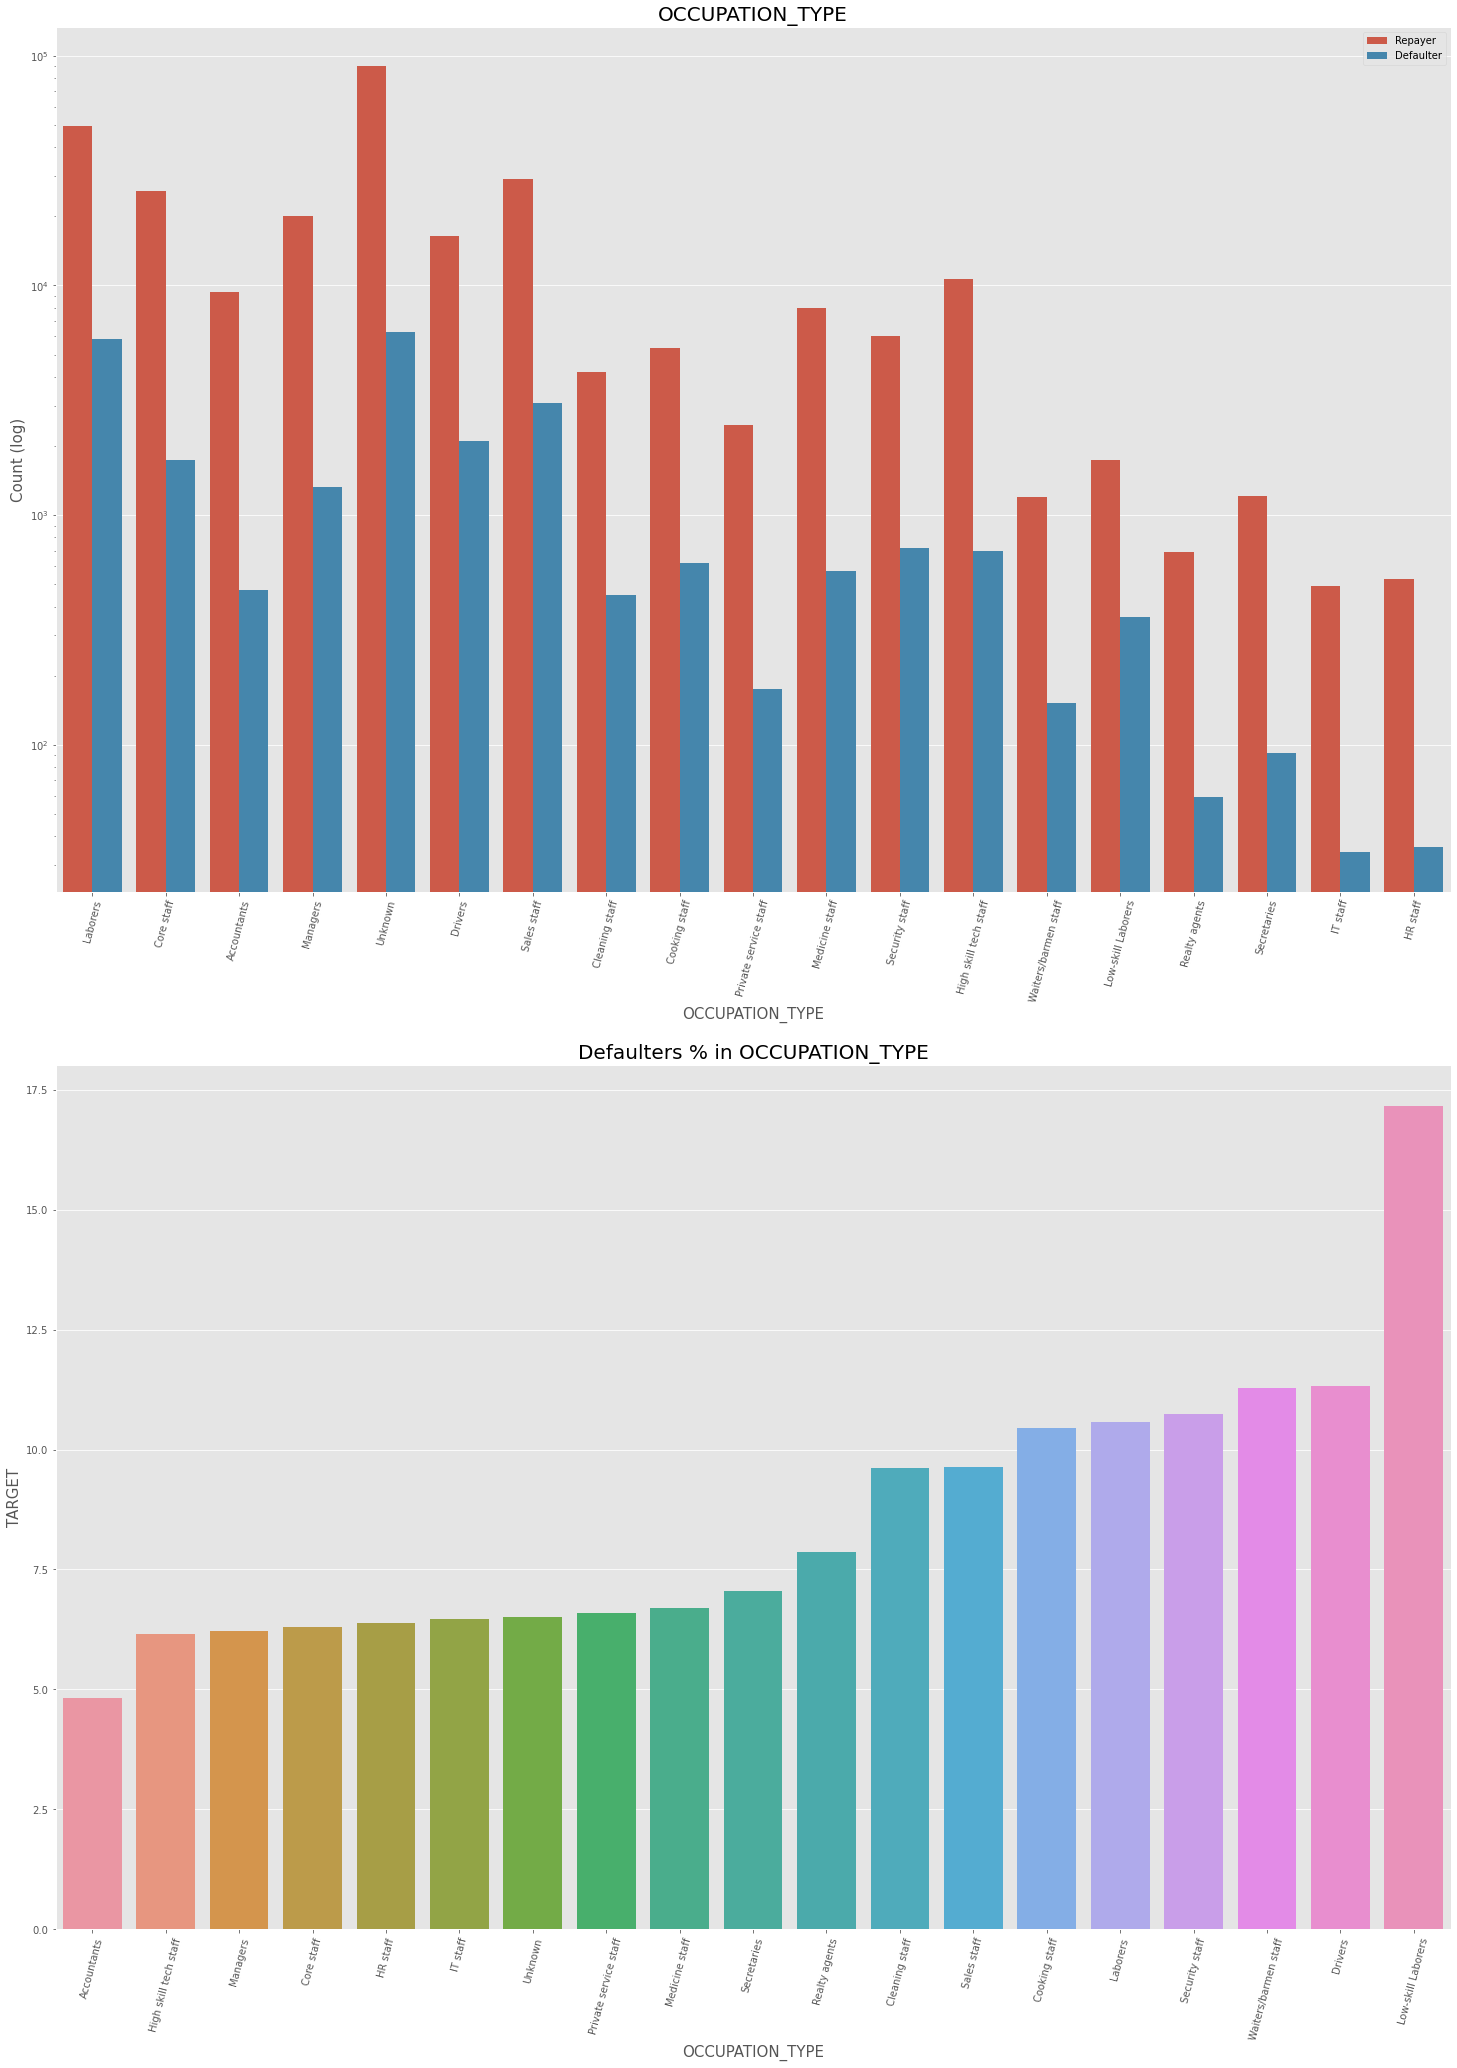

In [443]:
#10 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(app_train,"OCCUPATION_TYPE","TARGET",True,True,False)

Inferences:

    - Most of the loans are taken by Laborers, followed by Sales staff.
    - IT staff are less likely to apply for Loan.
    - Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen           staff, Security staff, Laborers and Cooking staff

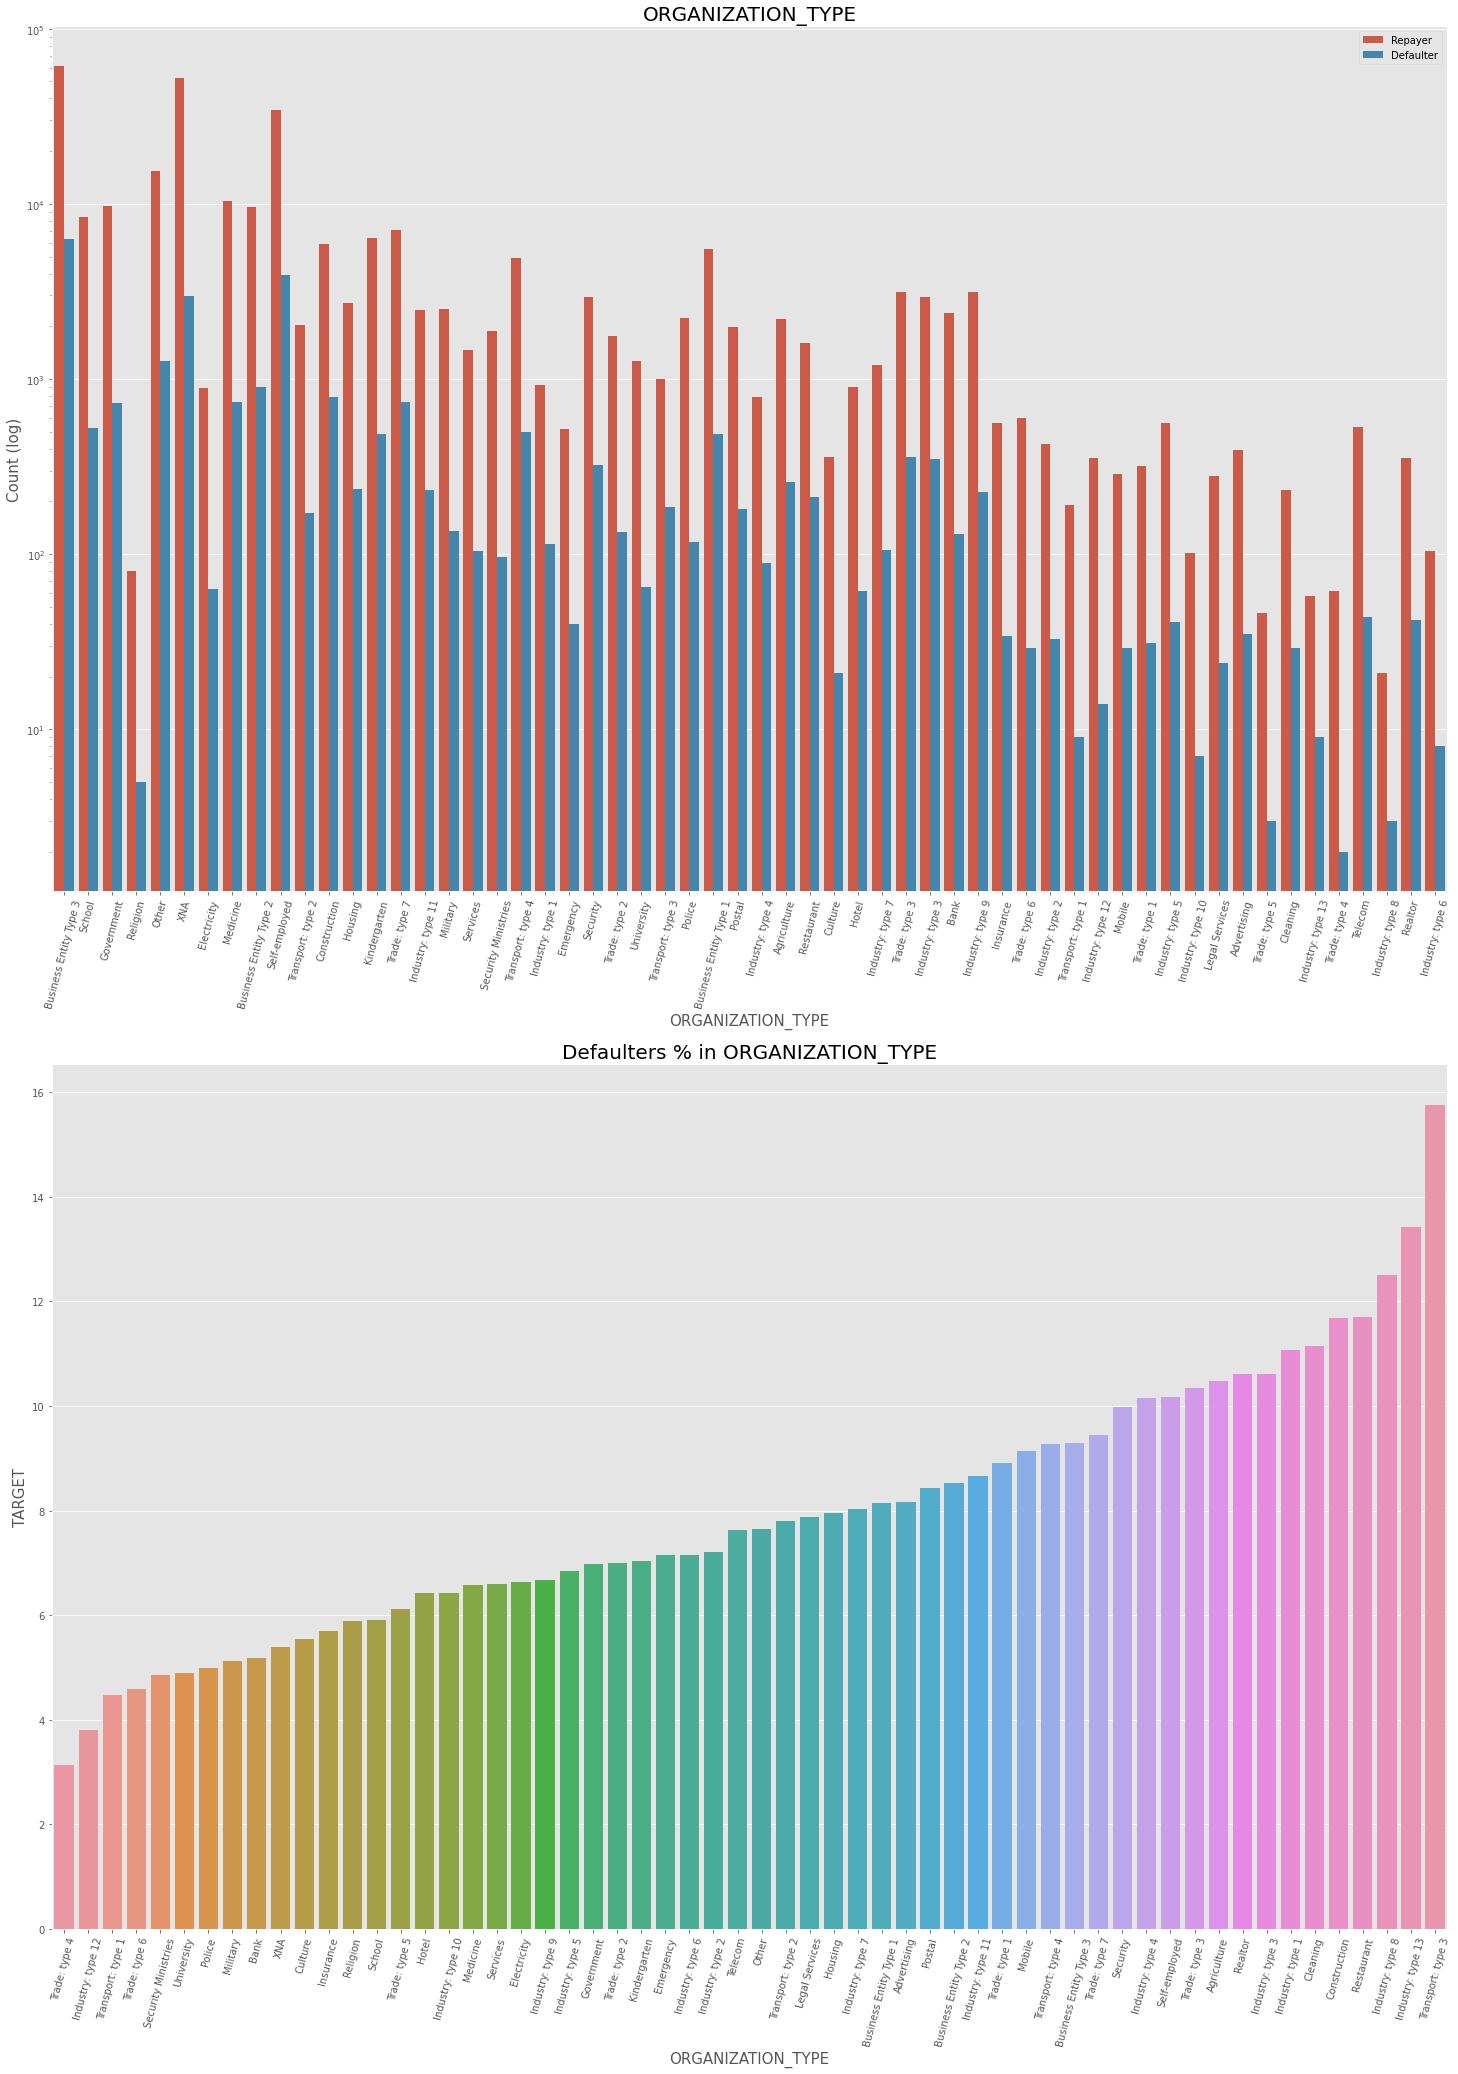

In [444]:
#11 Checking Loan repayment status based on Organization type

univariate(app_train,"ORGANIZATION_TYPE","TARGET",True,True,False)

Inferences: Organization Type

    - Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
    - Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.
    - Most of the people application for loan are from Business Entity Type 3
    - For a very high number of applications, Organization type information is unavailable(XNA)
    - It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8

## 5.3.2 Categorical Bivariate or Multivariate Analysis 

In [445]:
app_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71616.0,2.029547,1.479751,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158771.0,1.631698,3.075806,0.2565,1.125,1.3500,2.02500,1170.0000


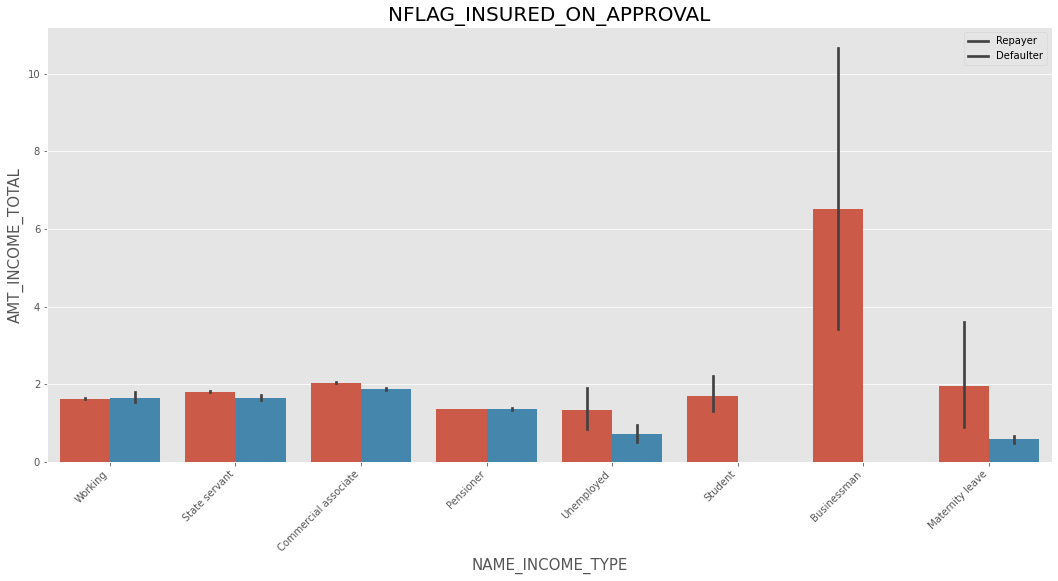

In [446]:
 #Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app_train,"TARGET",(18,8),['Repayer','Defaulter'])

Inferences:

    - It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

## 5.4 Numeric Variables Analysis

### Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis



In [447]:
#Listing all the columnns of dataframe "app_train"
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

In [448]:
 #bisecting the app_train dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = app_train.loc[app_train['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = app_train.loc[app_train['TARGET']==1, cols_for_correlation]

In [449]:
len(cols_for_correlation)

41

### Correlation between numeric variable



In [450]:
 #Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.987253
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950148
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878570
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
92,AMT_ANNUITY,AMT_CREDIT,0.771308
216,DAYS_EMPLOYED,DAYS_BIRTH,0.618051
335,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539010
365,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537307


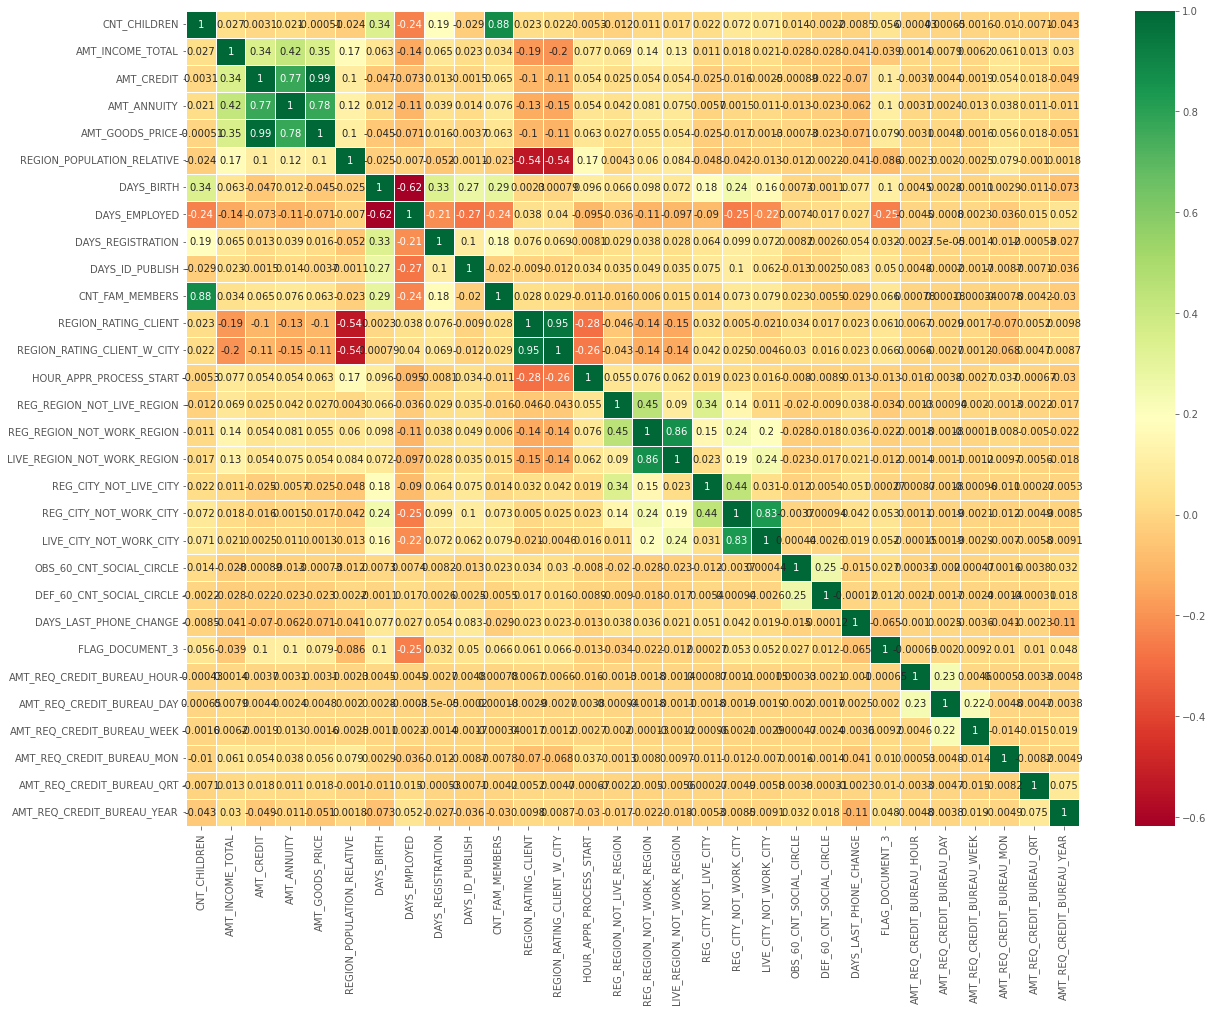

In [451]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

Inferences: Correlating factors amongst repayers

     - Credit amount is highly correlated with:

        - Goods Price Amount
        - Loan Annuity
        - Total Income
    - We can also see that repayers have high correlation in number of days employed.

In [452]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
92,AMT_ANNUITY,AMT_CREDIT,0.752195
216,DAYS_EMPLOYED,DAYS_BIRTH,0.575097
464,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937
557,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472052


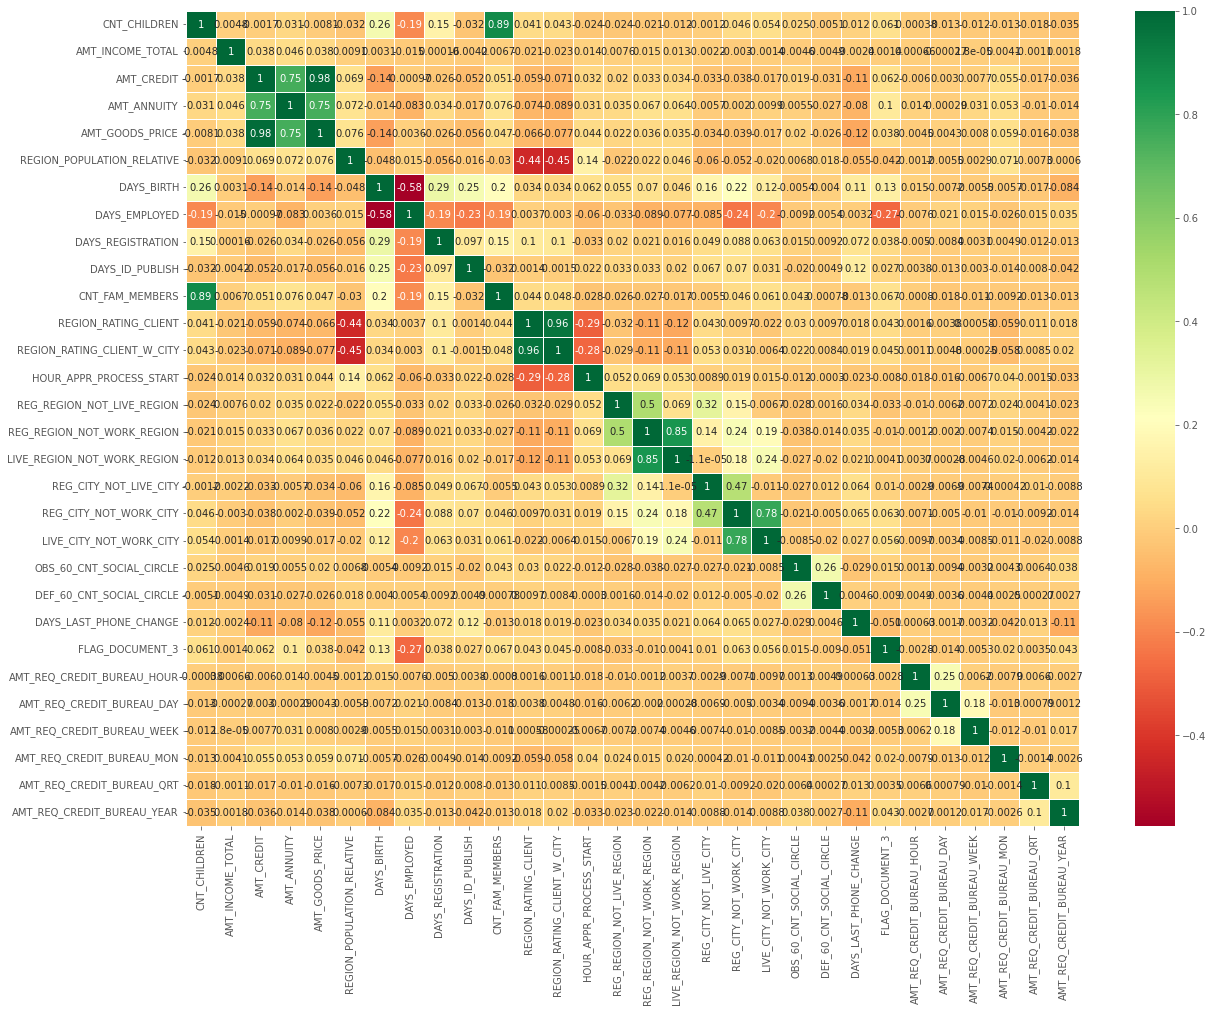

In [453]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

## 5.5 Numerical Univariate Analysis

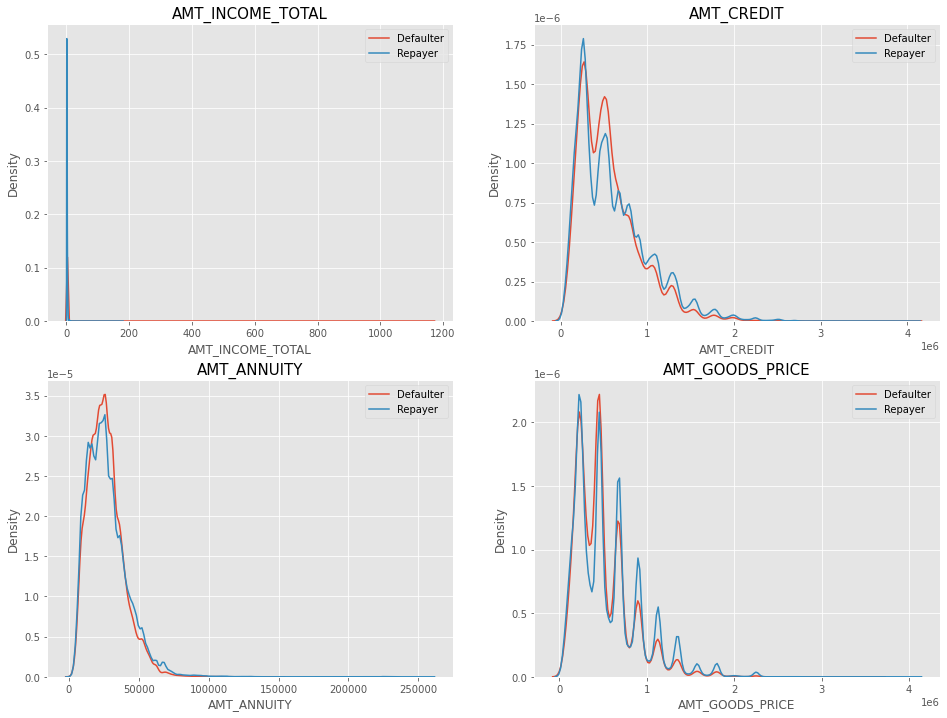

In [454]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = app_train[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

Inferences:

    - Most no of loans are given for goods price below 10 lakhs
    - Most people pay annuity below 50K for the credit loan
    - Credit amount of the loan is mostly less then 10 lakhs
    - The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

## 5.6 Numerical Bivariate Analysis

<Figure size 1080x1080 with 0 Axes>

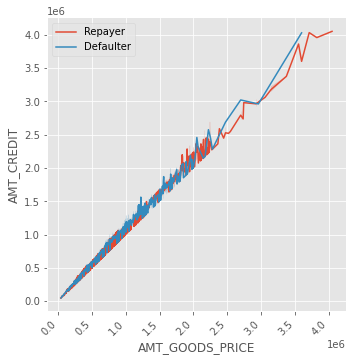

In [455]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',app_train,"TARGET", "line",['Repayer','Defaulter'])

Inferences:

    -When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.

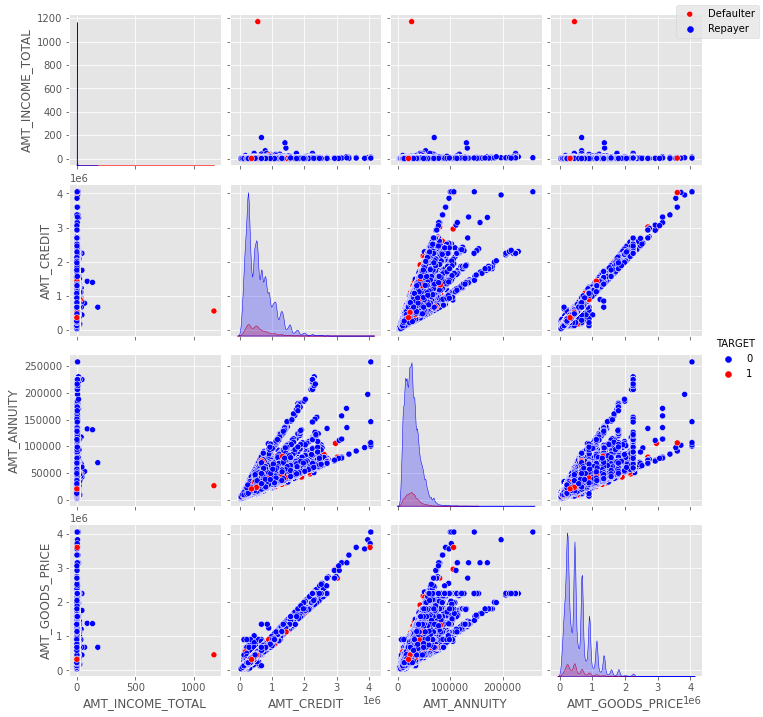

In [456]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = app_train[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

Inferences:

    - When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters
    - Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
    - There are very less defaulters for AMT_CREDIT >20 Lakhs

## 5.7  Merged Dataframes Analysis

In [457]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = merged_train[merged_train['TARGET']==0] # Repayers
L1 = merged_train[merged_train['TARGET']==1] # Defaulters

### Plotting Contract Status vs purpose of the loan



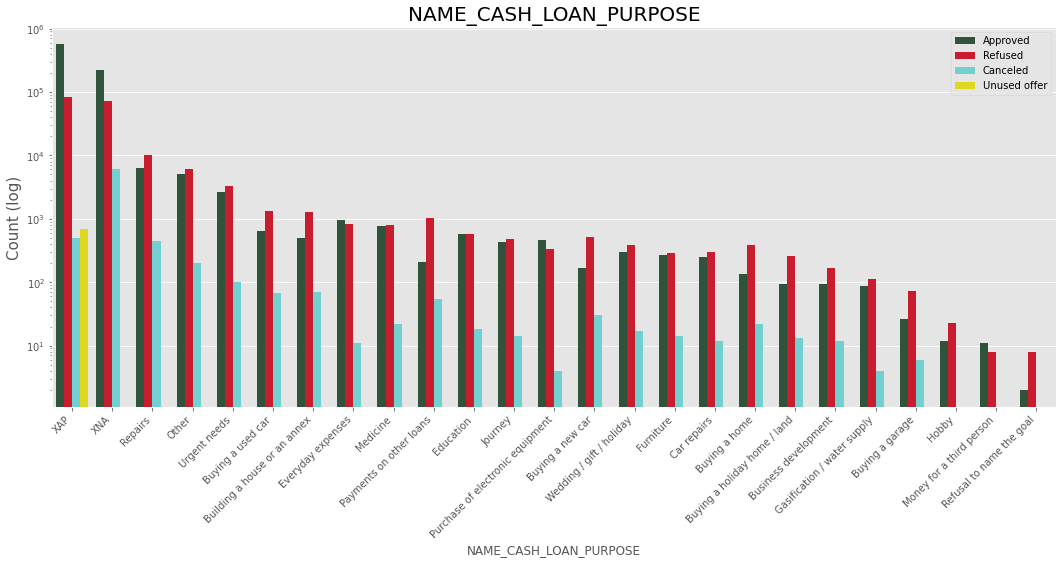

In [458]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))


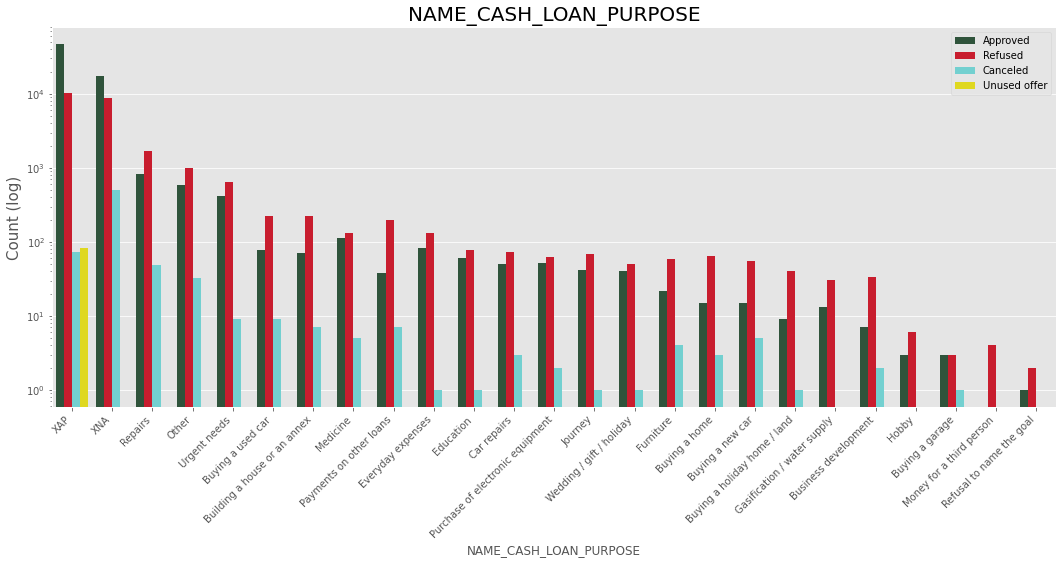

In [459]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))


Inferences:

    - Loan purpose has high number of unknown values (XAP, XNA)
    - Loan taken for the purpose of Repairs looks to have highest default rate
    - Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this 
    - we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.

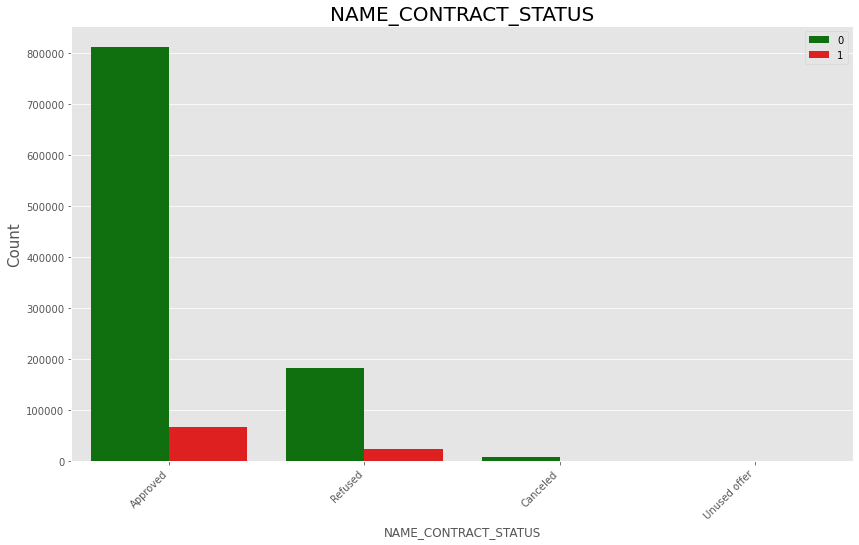

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       811767     92.38%
                     1        66934      7.62%
Canceled             0         7769     91.55%
                     1          717      8.45%
Refused              0       183260     88.36%
                     1        24137     11.64%
Unused offer         0          701     89.53%
                     1           82     10.47%

In [460]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",merged_train,"TARGET",['g','r'],False,(14,8))
r = merged_train.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1


Inferences:

    -90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients
    -88% of the clients who have been previously refused a loan has payed back the loan in current case.
    -Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.

* From the above Data Analysis we can infer that the groups that is less likely to default is :
    - Clients who are working as a state servant.
    - Old people of any income group.
    - Client with high income category.
    - Old female client.
    - Client with higher education (female).
    - Any client whose previous loan was approved.
    

* And groups that are more likely to default is 
    - Lower secondary educated clients are the most in
    - number to be defaulted when their previous loans were cancelled or refused
    - Male clients with civil marriage.
    - Previously refused loan status group 